**Comprehension - RFM Analysis**

In this segment, you will be attempting some assessments based on RFM analysis. RFM analysis(https://en.wikipedia.org/wiki/RFM_(market_research)) is a common practice in marketing to group customers. In RFM, R stands for “recency,” which means how recently the customer purchased, F stands for “frequency,” which means how frequently they are buying, and M stands for “monetary value,” which indicates how much they spend. For example, suppose a customer has 30 recency, 50 frequency, and 1000 monetary value. In that case, it means that the customer has not made any purchase in the previous 30 days, but he has made 50 purchases in the last one year with a total amount of $1000.

An online store wanted to run its new marketing campaign, for which they wanted to perform customer segmentation so they could run a targeted campaign for each group of customers.
This task was given to a data scientist, and they provided him with the data for the past one year to perform customer segmentation. The dataset was segregated based on order, with each entry having a unique invoice id. To perform clustering on customers, he aggregates the dataset at the customer level such that each entry has a unique customer id. To execute this, he performed “RFM Analysis.”

After performing RFM analysis, the obtained data has been put into a DataFrame and given to you for further analysis. The data has the following RFM attributes:

*   **CustomerID**: Unique ID of the customers
*   **recency**: How recently the customer has purchased from the store (in days)

*   **frequency**: how frequently the customer has purchased in a year

*   **amount**: how much the customer has spent (in dollars)









In [1]:
# importing all the relevant libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# load the data and store it in "rfm_df" variable

rfm_df = pd.read_csv('rfm_data.csv')
rfm_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


**Q1** - Removing outliers is a very important step before performing any clustering algorithm in order to get better clusters. Set the CustomerID column as index and perform outliers treatment for all the columns. After removing the outliers, what is the average amount spent (in dollars)? (Round off the answer to the nearest two digits)

Note - The code for this has already been provided

a. 1521.41

b. 1340.34

c. 1142.42

d. 1270.41


In [3]:
#set the CustomerID column as index
rfm_df = rfm_df.set_index('CustomerID')

In [4]:
#run this cell of code to remove outliers

#for amount
Q1 = rfm_df.amount.quantile(0.05)
Q3 = rfm_df.amount.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.amount >= Q1 - 1.5*IQR) & (rfm_df.amount <= Q3 + 1.5*IQR)]

#for recency
Q1 = rfm_df.recency.quantile(0.05)
Q3 = rfm_df.recency.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.recency >= Q1 - 1.5*IQR) & (rfm_df.recency <= Q3 + 1.5*IQR)]

#for frequency
Q1 = rfm_df.frequency.quantile(0.05)
Q3 = rfm_df.frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.frequency >= Q1 - 1.5*IQR) & (rfm_df.frequency <= Q3 + 1.5*IQR)]

In [5]:
#Calculate the average amount spent
rfm_df['amount'].mean()

1270.4114637782416

**Q2** - Now in the next steps, you have to standardize the data and perform the K-means clustering using the default number of initial cluster means. Which of the following cluster has the maximum number of observations?

a. Cluster 2

b. Cluster 4

c. Cluster 8

d. Cluster 7


In [6]:
#standardize the data

rfm_df=rfm_df-rfm_df.mean()
rfm_df=rfm_df-rfm_df.std()

In [8]:
#import the KMeans function
from sklearn.cluster import KMeans

In [9]:
#choose random state as 744 and fit the data in it

kmeans=KMeans(random_state=744)
kmeans.fit(rfm_df)

KMeans(random_state=744)

In [29]:
#store the cluster labels in pandas series 'a'

M=kmeans.cluster_centers_
M=pd.DataFrame(a, index=np.arange(kmeans.n_clusters)+1)
M

,0,1,2
1,-2773.580961,-154.623268,-52.849749
2,702.392410,36.159018,-161.748650
3,8230.937381,149.960260,-174.460175
4,4563.047238,100.303117,-170.169699
5,-1461.580935,-70.976832,-143.483483
6,-506.316223,-14.335421,-156.261808
7,2344.415129,75.354083,-172.933791
8,-2227.123343,-115.243648,-119.181828


In [35]:
a=kmeans.labels_+1
a=pd.Series(a)

In [36]:
a.value_counts().sort_index()

1    1888
2     207
3      42
4      70
5     569
6     346
7     111
8    1060
dtype: int64

In [37]:
print('Cluster', a.mode().values[0], 'has the maximum number of observations')

Cluster 1 has the maximum number of observations


**Q3** - Now, use the elbow method to choose the best value of K. First, calculate the SSE using the inertia_ variable for the default number of clusters and mark the correct option given below: (Round of the answer to the nearest two digits)

a. 1826.55

b. 1596.87

c. 1707.01

d. 1856.35


In [38]:
# write your code here

SSE = kmeans.inertia_
SSE


405019807.43132263

In [41]:
np.sum(np.sum((rfm_df-M.loc[a].values)**2, axis=1))

405019807.4313226

**Q4** - Specify the maximum K value as 8 and random_state as 0. Plot the elbow curve, and based on the curve, which of the following value of K will be the ideal number of clusters for the data set?

a. K = 7

b. K = 5

c. K = 3

In [43]:
# Specify the maximum K value as 8
n_k_values = 8

In [44]:
# Specify the random state as 0
random_state=0

In [45]:
# Create a dictionary in which you will store the estimated K-means objects
kmeans_objects={}

In [46]:
# Create a pandas series in which you will store the SSE values for each K-means object
kmeans_sse=pd.Series(data=np.zeros(n_k_values), index=np.arange(n_k_values)+1)

In [49]:
# perform K-means clustering for the values k = 1, 2, ..., 8 using for loop

for k in range(1, n_k_values+1):
    
    # fix your random state
    kmeans=KMeans(n_clusters=k, random_state=random_state).fit(rfm_df)
    
    # save the kmeans object in the dictionary at key k
    kmeans_objects[k]=kmeans

    # save the kmeans SSE value at location k
    kmeans_sse.loc[k]=kmeans.inertia_
    
    print('Done with:k =', k)
  

Done with:k = 1
Done with:k = 2
Done with:k = 3
Done with:k = 4
Done with:k = 5
Done with:k = 6
Done with:k = 7
Done with:k = 8


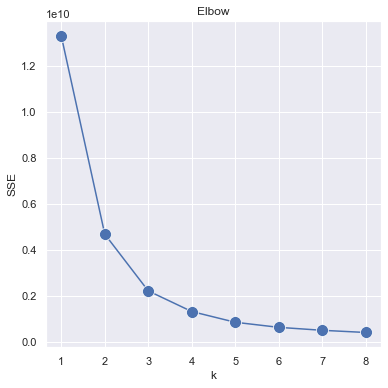

In [50]:
#plot the elbow curve

plt.figure(figsize=(6,6))

plt.title('Elbow')
plt.ylabel('SSE')
plt.xlabel('k')

sns.lineplot(x=range(1, n_k_values + 1), y=kmeans_sse, marker='o', markersize=12)

plt.xticks(range(1, n_k_values+1))
plt.show()

**Q5** - Choose K = 3 and do the K-means clustering. How many observations does cluster 2 have?

a. 499

b. 2726

c. 1068

d. None of these


In [51]:
# Get K-means object for K=3
kmeans=kmeans_objects[3]

In [52]:
# Extract the cluster means
M=kmeans.cluster_centers_
M=pd.DataFrame(M, index=np.arange(kmeans.n_clusters)+1, columns=variable_labels)

NameError: name 'variable_labels' is not defined

In [53]:
# Extract the cluster assignments
a=kmeans.labels_+1
a=pd.Series(a)

**Q6 -**  Now we have three different clusters with each clusters having different charactersitcs. Among the three obtained clusters, the company wants to offer heavy discounts for the group of customers having least average amount spent. Which cluster they should choose?

a. Cluster 1

b. Cluster 2

c. Cluster 3

In [21]:
#append the cluster assignment to the unstandardized data set

**Q7**  - Perform hierarchical clustering using linkage function. Now based on the resultant clustering, which two clusters will get merged first?

a. 127 and 467

b. 1364 and 3082

c. 3302 and 4299

d. 2512 and 3647


In [22]:
# import linkage function and dendrogram 

from scipy.cluster.hierarchy import linkage, dendogram


In [23]:
#fit the standardized data in linkage function and perform hierarchical clustering
numpy_Z=linkage(rfm_df)

In [24]:
#create a DataFrame using the results of the hierarchical clustering
Z=pd.DataFrame(numpy_Z, columns=[])

**Q8** - In the previous steps, you applied the linkage function using the default linkage method which is single linkage, in which the last pair of clusters that got merged were cluster no. 561 and 8583. Now use the complete linkage method and find out which two clusters will get merged at the end.

a. 8737 and 8738

b. 3758 and 8734

c. 8735 and 8739

d. 8582 and 8583


In [25]:
# perform hierarchical clustering using complete linkage method